In [90]:
import numpy as np
from  datascience import *
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Funciones

In [128]:
def nombre_funcion(a, b):
    """
    Esto realiza la suma de enteros
    """
    return a + b

In [129]:
nombre_funcion("hola", " mundo")

'hola mundo'

In [130]:
nombre_funcion("Clase de", " Fundamentos de computación")

'Clase de Fundamentos de computación'

In [131]:
def suma_de_valores(a, b):
    return a+b

In [132]:
suma_de_valores(10, 10)

20

In [133]:
def es_par(n):
    return n%2==0

In [134]:
es_par(3)

False

In [194]:
def contar_vocales(palabra):
    ...
    ...
    Crear una funcion que permita contar vocales dentro de un texto


SyntaxError: invalid syntax (1185261076.py, line 4)

# Repaso función apply 

Aplica una función a toda una columna,
esta función puede ser una transformación de los datos, desde pasar de string 
a float o hacer operaciones con la columna.

Sintaxis:
```python 
table().apply(funcion, nombre_columna)
```

Veamos un ejemplo: 


Supongamos que tenemos una tabla con las columnas: `Tiempo` y `concentracion_celulas`, asociadas a un modelo 
de crecimiento de celulas, en las cuales, cada uno de los valores son variables tipo string


In [195]:
edades = Table().with_columns(
    'Pesona', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Edad', make_array(17, 117, 52, 100, 6, 101)
)
edades

Pesona,Edad
A,17
B,117
C,52
D,100
E,6
F,101


In [196]:
def minimo_(x):
    return min(x, 40)

In [197]:
edades.apply(minimo_, "Edad")

array([17, 40, 40, 40,  6, 40])

In [198]:
edades = Table().with_columns(
    'Pesona', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Edad', make_array(17, 117, 52, 100, 6, 101)
)
edades

Pesona,Edad
A,17
B,117
C,52
D,100
E,6
F,101


In [199]:
type(minimo_)

function

In [200]:
# Crear la tabla
celulas = Table().with_columns(
    'Tiempo', ['0s', '1s', '2s', '3s', '4s'],
    'Concentracion_Celulas', ['1.0 %', ' 1.8%', ' 3.0%', '5.5 %', '10.0%' ]
)

In [201]:
celulas

Tiempo,Concentracion_Celulas
0s,1.0 %
1s,1.8%
2s,3.0%
3s,5.5 %
4s,10.0%


In [202]:
...

Ellipsis

In [203]:
...

Ellipsis

In [204]:
...

Ellipsis

In [205]:
....

SyntaxError: invalid syntax (1805539695.py, line 1)

In [206]:
# Crear la tabla
celulas = Table().with_columns(
    'Tiempo', ['0s', '1s', '2s', '3s', '4s'],
    'Concentracion_Celulas', ['1.0 %', ' 1.8%', ' 3.0%', '5.5 %', '10.0%' ]
)

Realicemos un cambio con la función apply, pero primero realicemos la operacion sobre un string, para poder construir la función general 

In [207]:
a=" 1.0% $"

In [208]:
a.replace("%", "")

' 1.0 $'

In [209]:
a.replace("%", "")

' 1.0 $'

In [210]:
a.replace("%", "").replace("$","")

' 1.0 '

In [211]:
a.replace("%", "").replace("$","").strip()

'1.0'

Construyendo la función...

In [212]:
def to_float(x):
    """ convert a variable with % or $ and space to float """    
    return float(x.replace("%", "").replace("s","").strip())

In [213]:
celulas.column("Tiempo")

array(['0s', '1s', '2s', '3s', '4s'],
      dtype='<U2')

In [214]:
celulas.apply(to_float, "Concentracion_Celulas")

array([  1. ,   1.8,   3. ,   5.5,  10. ])

In [215]:
celulas.apply(to_float, "Tiempo")

array([ 0.,  1.,  2.,  3.,  4.])

ya que sabemos como funciona y que opera bien, agreguemos las nuevas columnas en el conjunto de datos.

In [216]:
celulas = celulas.with_column("Tiempo_h", celulas.apply(to_float, "Tiempo"))
celulas = celulas.with_column("Concentracion_Celulas_", celulas.apply(to_float, "Concentracion_Celulas"))

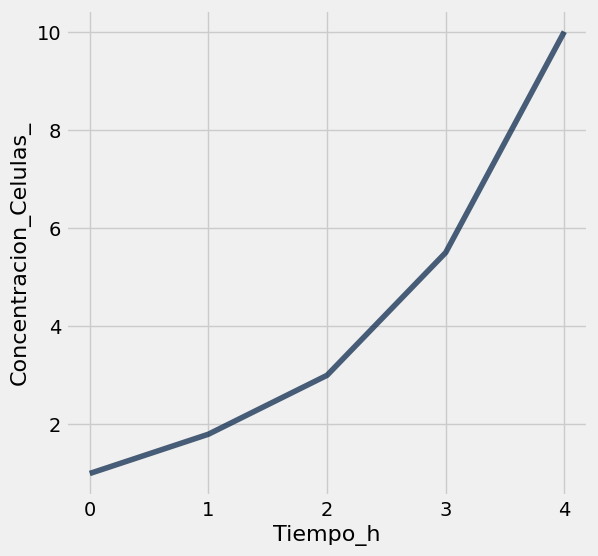

In [217]:
celulas.plot("Tiempo_h", "Concentracion_Celulas_")

# Operación `Group`

In [218]:
# Crear la tabla
satisfaccion = Table().with_columns(
    'Individuo', make_array('Persona 1', 'Persona 2', 'Persona 3', 'Persona 4', 'Persona 5', 'Persona 6', 'Persona 7', 'Persona 8'),
    'Practica Ejercicio', make_array('Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Sí', 'No'),
    'Satisfacción con la Vida (1-10)', make_array(8, 5, 7, 4, 9, 6, 7, 3),
    'Horas de Ejercicio por Semana', make_array(5, 0, 6, 0, 4, 0, 7, 0)
)

satisfaccion.show()


Individuo,Practica Ejercicio,Satisfacción con la Vida (1-10),Horas de Ejercicio por Semana
Persona 1,Sí,8,5
Persona 2,No,5,0
Persona 3,Sí,7,6
Persona 4,No,4,0
Persona 5,Sí,9,4
Persona 6,No,6,0
Persona 7,Sí,7,7
Persona 8,No,3,0


In [219]:
satisfaccion.group("Practica Ejercicio")

Practica Ejercicio,count
No,4
Sí,4


Otro ejemplo:

Supongamos que tenemos la siguiente tabla de libros clasicos: 

In [220]:
from datascience import *

# Crear la tabla con 20 libros
libros = Table().with_columns(
    'Titulo', make_array(
        'Cien Años de Soledad', 'El Quijote', '1984', 'Orgullo y Prejuicio', 'Crimen y Castigo', 
        'El Principito', 'Don Juan Tenorio', 'Matar a un Ruiseñor', 'La Odisea', 'El Gran Gatsby',
        'Fahrenheit 451', 'La Metamorfosis', 'El Retrato de Dorian Gray', 'Hamlet', 'Macbeth',
        'La Ilíada', 'El Señor de los Anillos', 'Drácula', 'Los Miserables', 'La Divina Comedia'),
    
    'Autor', make_array(
        'Gabriel García Márquez', 'Miguel de Cervantes', 'George Orwell', 'Jane Austen', 'Fiódor Dostoyevski', 
        'Antoine de Saint-Exupéry', 'José Zorrilla', 'Harper Lee', 'Homero', 'F. Scott Fitzgerald', 
        'Ray Bradbury', 'Franz Kafka', 'Oscar Wilde', 'William Shakespeare', 'William Shakespeare',
        'Homero', 'J. R. R. Tolkien', 'Bram Stoker', 'Victor Hugo', 'Dante Alighieri'),
    
    'Genero', make_array(
        'Ficción', 'Clásico', 'Ciencia Ficción', 'Romance', 'Clásico', 
        'Ficción', 'Clásico', 'Ficción', 'Clásico', 'Ficción',
        'Ciencia Ficción', 'Ficción', 'Clásico', 'Clásico', 'Clásico',
        'Clásico', 'Fantasía', 'Terror', 'Clásico', 'Clásico'),
    
    'Precio (COP)', make_array(
        45000, 60000, 40000, 38000, 52000, 
        35000, 30000, 45000, 32000, 42000,
        37000, 25000, 48000, 51000, 50000,
        30000, 70000, 35000, 68000, 63000),
    
    'Anio de Publicacion', make_array(
        1967, 1605, 1949, 1813, 1866,
        1943, 1844, 1960, 'Siglo VIII a.C.', 1925,
        1953, 1915, 1890, 1603, 1606,
        'Siglo VIII a.C.', 1954, 1897, 1862, 1320),
    
    'Calificacion (1-5)', make_array(
        4.8, 4.9, 4.7, 4.6, 4.8, 
        4.7, 4.4, 4.9, 4.6, 4.8,
        4.6, 4.5, 4.7, 4.9, 4.8,
        4.6, 4.9, 4.7, 4.9, 4.9)
)

In [221]:
libros

Titulo,Autor,Genero,Precio (COP),Anio de Publicacion,Calificacion (1-5)
Cien Años de Soledad,Gabriel García Márquez,Ficción,45000,1967,4.8
El Quijote,Miguel de Cervantes,Clásico,60000,1605,4.9
1984,George Orwell,Ciencia Ficción,40000,1949,4.7
Orgullo y Prejuicio,Jane Austen,Romance,38000,1813,4.6
Crimen y Castigo,Fiódor Dostoyevski,Clásico,52000,1866,4.8
El Principito,Antoine de Saint-Exupéry,Ficción,35000,1943,4.7
Don Juan Tenorio,José Zorrilla,Clásico,30000,1844,4.4
Matar a un Ruiseñor,Harper Lee,Ficción,45000,1960,4.9
La Odisea,Homero,Clásico,32000,Siglo VIII a.C.,4.6
El Gran Gatsby,F. Scott Fitzgerald,Ficción,42000,1925,4.8


In [222]:
libros.group("Genero", np.mean)

Genero,Titulo mean,Autor mean,Precio (COP) mean,Anio de Publicacion mean,Calificacion (1-5) mean
Ciencia Ficción,,,38500,,4.65
Clásico,,,48400,,4.75
Fantasía,,,70000,,4.9
Ficción,,,38400,,4.74
Romance,,,38000,,4.6
Terror,,,35000,,4.7


 Veamos que tendriamos que hacer para hacer esa operacion

In [223]:
libros.where("Genero", are.equal_to("Clásico")).column("Precio (COP)").sum()

484000

In [224]:

# Crear la tabla con más filas
tabla_frutas = Table().with_columns(
    'Fruta', np.array(['manzana', 'pera', 'manzana', 'fresa', 'pera', 'fresa', 
                       'banano', 'mango', 'kiwi', 'banano', 'mango', 'fresa', 
                       'kiwi', 'pera', 'banano', 'manzana', 'pera', 'fresa', 
                       'mango', 'manzana']),
    'Color', np.array(['rojo', 'verde', 'verde', 'rojo', 'verde', 'rojo', 
                       'verde', 'naranja', 'verde', 'amarillo', 'naranja', 'rojo', 
                       'verde', 'verde', 'amarillo', 'rojo', 'verde', 'rojo', 
                       'naranja', 'rojo']),
    'Precio', np.array([2500, 3500, 2500, 4000, 3500, 4000, 
                              1500, 3000, 4500, 1500, 3000, 4000, 
                              4500, 3500, 1500, 2500, 3500, 4000, 
                              3000, 2500])
)

In [225]:
tabla_frutas.group(["Fruta", "Color"], np.sum)

Fruta,Color,Precio sum
banano,amarillo,3000
banano,verde,1500
fresa,rojo,16000
kiwi,verde,9000
mango,naranja,9000
manzana,rojo,7500
manzana,verde,2500
pera,verde,14000


In [226]:
tabla_frutas.pivot("Fruta", "Color")

Color,banano,fresa,kiwi,mango,manzana,pera
amarillo,2,0,0,0,0,0
naranja,0,0,0,3,0,0
rojo,0,4,0,0,3,0
verde,1,0,2,0,1,4


In [227]:
!ls

lec08.ipynb           notable_ai_models.csv


In [228]:
#ia_table = Table().read_table("notable_ai_models.csv")

In [229]:
#ia_table.group("Domain")

In [188]:
#ia_table